In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle
import sys

sys.path.append("../optimization")
from datasets import *

import utils

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
TIMESTAMP_1_2_3 = "Oct04-1034"
TIMESTAMP_4_5_6 = "Oct04-1202"

## Simulation

Text(0.5, 1.05, 'Simulated Dataset')

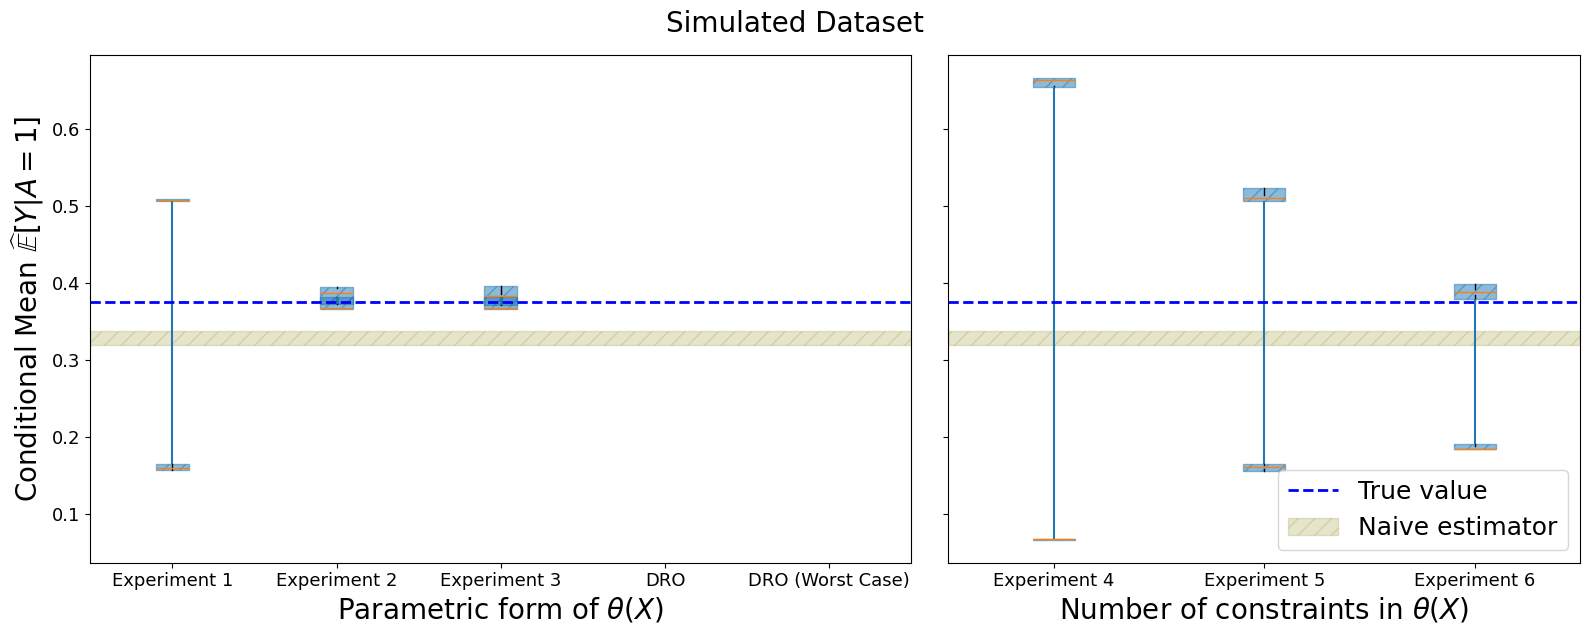

In [17]:
fig, ax = plt.subplots(ncols=2, figsize=(16, 6), sharey=True, width_ratios=[1.3, 1])

utils.generate_theta_plots_1_2_3(
    base_path="../experiment_artifacts/", timestamp=TIMESTAMP_1_2_3, ax=ax[0]
)

utils.generate_theta_plots_4_5_6(
    base_path="../experiment_artifacts/",
    timestamp=TIMESTAMP_4_5_6,
    ax=ax[1],
)

# Add a legend
ax[1].legend(loc="lower right", fontsize=18)

fig.tight_layout()
fig.suptitle("Simulated Dataset", fontsize=20, y=1.05)

## Folktables

Text(0.5, 1.05, 'Semi-Syntethic Dataset')

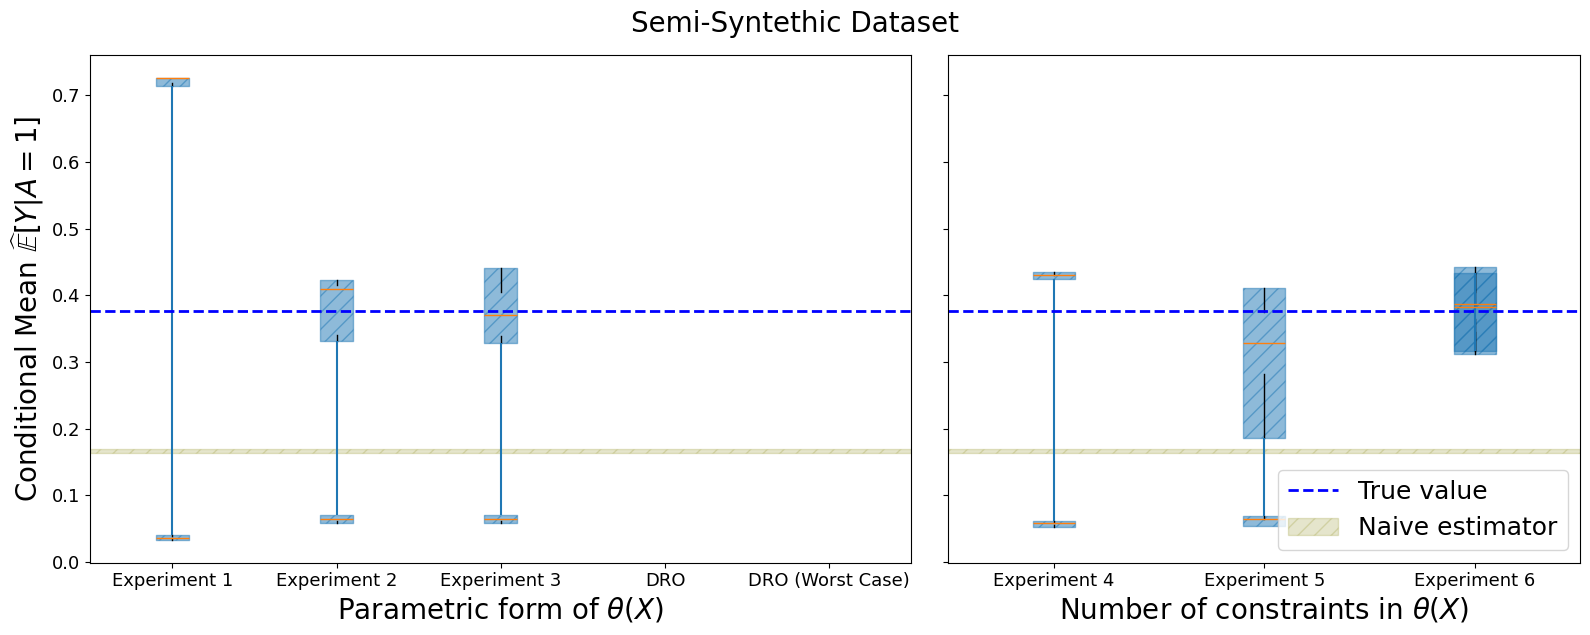

In [13]:
fig, ax = plt.subplots(ncols=2, figsize=(16, 6), sharey=True, width_ratios=[1.3, 1])

utils.generate_theta_plots_1_2_3(
    base_path="../experiment_artifacts/", timestamp=TIMESTAMP_1_2_3, ax=ax[0]
)

utils.generate_theta_plots_4_5_6(
    base_path="../experiment_artifacts/",
    timestamp=TIMESTAMP_4_5_6,
    ax=ax[1],
)

# Add a legend
ax[1].legend(loc="lower right", fontsize=18)

fig.tight_layout()
fig.suptitle("Semi-Syntethic Dataset", fontsize=20, y=1.05)

## Covariance

Text(0.5, 1.0, 'Semi-Syntethic Dataset')

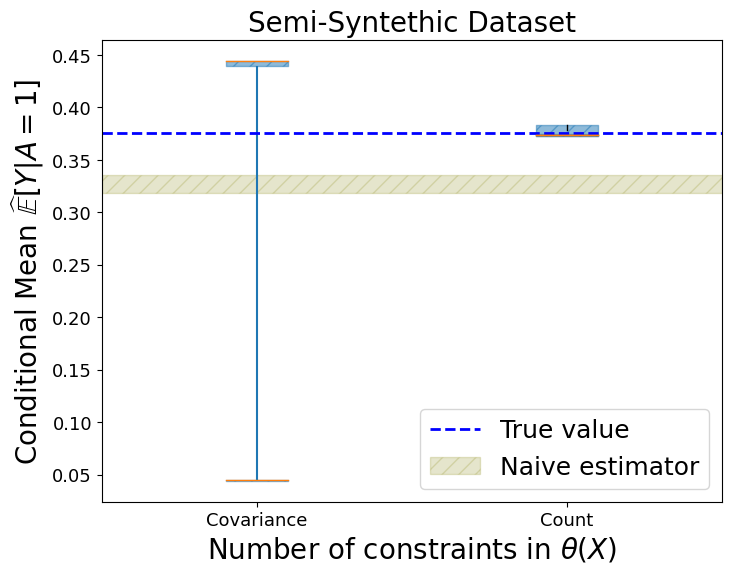

In [6]:
fig, ax = plt.subplots(figsize=(8, 6))

utils.generate_cov_plots(
    base_path="../experiment_artifacts/", timestamp="Sep28-2026", ax=ax
)

ax.set_title("Semi-Syntethic Dataset", fontsize=20)

## Folktables

In [24]:
plotting_df = pd.read_csv("../experiment_artifacts/Sep24-1905/plotting_df.csv")
plotting_df.head()

,max_bound,min_bound,max_loss,min_loss,restriction_type,trial_idx,matrix_type,step,n_cov_pairs,interval_size,random_seed,true_conditional_mean,empirical_conditional_mean,rho
0,0.500131,0.130324,0.425327,0.436118,cov_positive,0,Nx8,0,1.0,0.369807,0,0.375811,0.432007,NaN
1,0.500131,0.130324,0.425704,0.435816,cov_positive,0,Nx8,1,1.0,0.369807,0,0.375811,0.432007,NaN
2,0.500131,0.130324,0.426071,0.435517,cov_positive,0,Nx8,2,1.0,0.369807,0,0.375811,0.432007,NaN
3,0.500131,0.130324,0.426429,0.435219,cov_positive,0,Nx8,3,1.0,0.369807,0,0.375811,0.432007,NaN
4,0.500131,0.130324,0.426778,0.434924,cov_positive,0,Nx8,4,1.0,0.369807,0,0.375811,0.432007,NaN


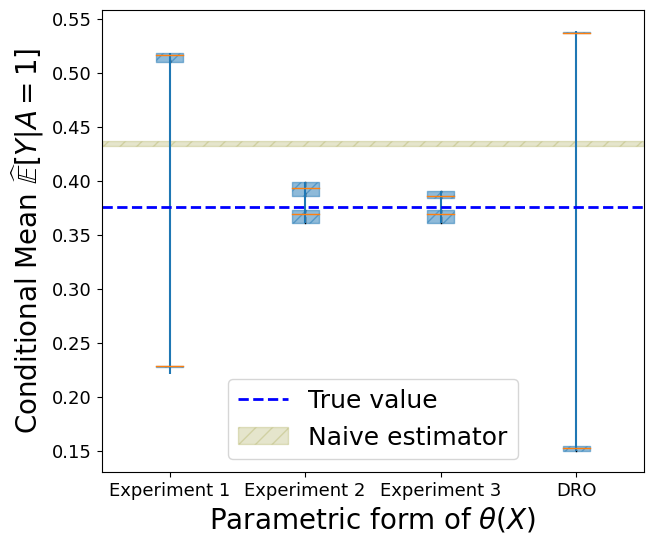

In [96]:
utils.generate_theta_plots_1_2_3(
    base_path="../experiment_artifacts/", timestamp="Sep19-2240"
)

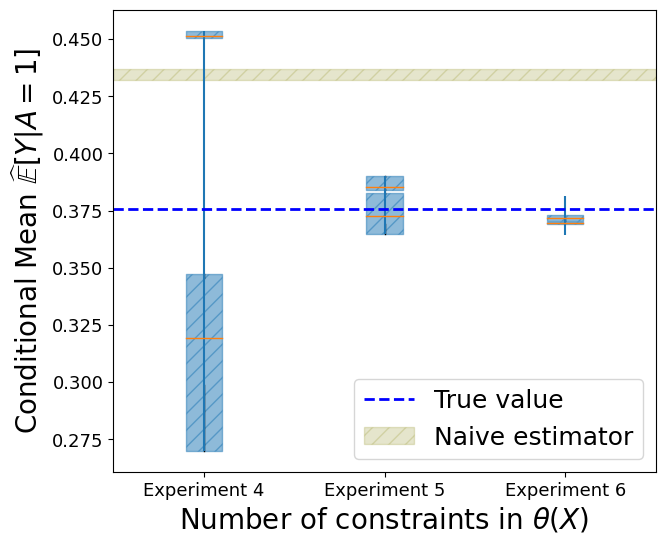

In [94]:
utils.generate_theta_plots_4_5_6(
    base_path="../experiment_artifacts/", timestamp="Sep19-2229"
)

In [4]:
def load_vals(path):
    vals = []
    for i in range(1):
        value = np.load(path + str(i) + ".npy")[-1]
        vals.append(value)
    return np.array(vals)

In [5]:
min_vals_1 = load_vals("results/model/interactions/min_loss_full_")
max_vals_1 = load_vals("results/model/interactions/max_loss_full_")
min_vals_2 = load_vals("results/model/interactions/min_loss_tight_")
max_vals_2 = load_vals("results/model/interactions/max_loss_tight_")

In [6]:
# Calculate average and standard deviation for each experiment
avg_max_1 = np.mean(max_vals_1)
std_max_1 = np.std(max_vals_1)
avg_min_1 = np.mean(min_vals_1)
std_min_1 = np.std(min_vals_1)
avg_max_2 = np.mean(max_vals_2)
std_max_2 = np.std(max_vals_2)
avg_min_2 = np.mean(min_vals_2)
std_min_2 = np.std(min_vals_2)
print(avg_max_1, avg_min_1, std_max_1, std_min_1)
print(avg_max_2, avg_min_2, std_max_2, std_min_2)

-0.005203041 -0.78835505 0.0 0.0
-0.45543143 -0.5436359 0.0 0.0


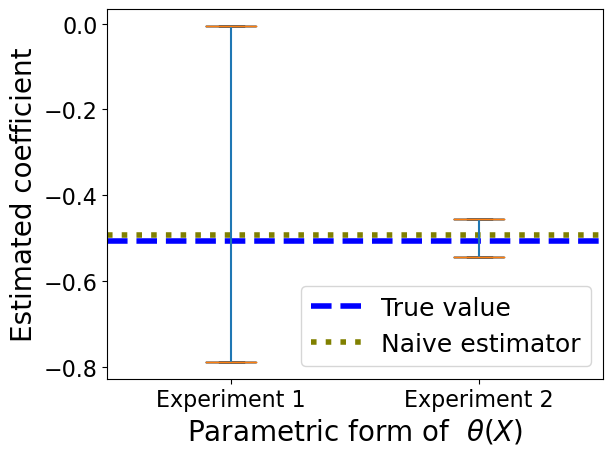

In [7]:
fig, ax = plt.subplots()

# Set the x-axis limits and labels
# ax.set_xlim([0.5, 3.5])

ax.axhline(
    y=-0.5062343240376521,
    color="blue",
    linestyle="dashed",
    label="True value",
    linewidth=4,
)
ax.axhline(
    y=-0.4916980438825214,
    color="olive",
    linestyle=":",
    label="Naive estimator",
    linewidth=4,
)

ax.boxplot(
    [max_vals_1.flatten(), min_vals_1.flatten()],
    positions=[1, 1],
    widths=0.2,
    showfliers=False,
)
plt.vlines(1, ymin=min(min_vals_1), ymax=max(max_vals_1))

ax.boxplot(
    [max_vals_2.flatten(), min_vals_2.flatten()],
    positions=[2, 2],
    widths=0.2,
    showfliers=False,
)
plt.vlines(2, ymin=min(min_vals_2), ymax=max(max_vals_2))


ax.set_xticks([1, 2])
ax.set_xticklabels(["Experiment 1", "Experiment 2"])

ax.tick_params(axis="both", which="major", labelsize=16)
ax.tick_params(axis="both", which="minor", labelsize=16)


ax.set_ylabel("Estimated coefficient", fontsize=20)
ax.set_xlabel("Parametric form of  $\\theta(X)$", fontsize=20)

# # Add a legend
ax.legend(loc="lower right", fontsize=18)

plt.savefig(r"figures/restrictions_semi-synthetic_beta.png", bbox_inches="tight")

In [7]:
min_vals_2 = load_vals("results/model/Restrictions/max_loss_full_g")
max_vals_2 = load_vals("results/model/Restrictions/min_loss_full_g")
min_vals_1 = load_vals("results/model/Restrictions/min_loss_non_tight_g")
max_vals_1 = load_vals("results/model/Restrictions/max_loss_non_tight_g")

In [9]:
# Calculate average and standard deviation for each experiment
avg_max_1 = np.mean(max_vals_1)
std_max_1 = np.std(max_vals_1)
avg_min_1 = np.mean(min_vals_1)
std_min_1 = np.std(min_vals_1)
avg_max_2 = np.mean(max_vals_2)
std_max_2 = np.std(max_vals_2)
avg_min_2 = np.mean(min_vals_2)
std_min_2 = np.std(min_vals_2)
print(avg_max_1, avg_min_1, std_max_1, std_min_1)
print(avg_max_2, avg_min_2, std_max_2, std_min_2)

-0.42938527 -0.6182439 0.0 0.0
-0.5199731 -0.4617869 0.0 0.0


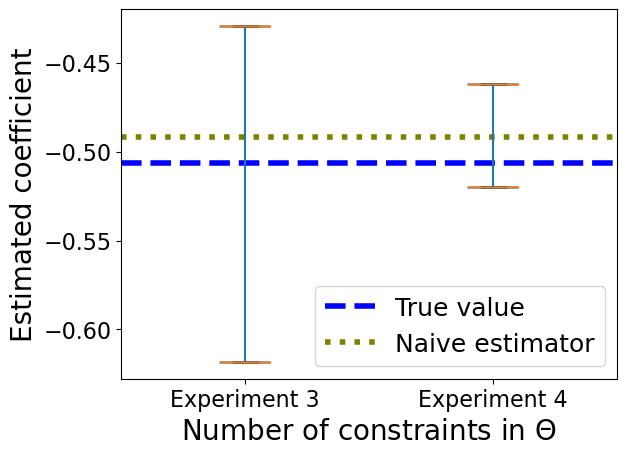

In [10]:
fig, ax = plt.subplots()

# Set the x-axis limits and labels
# ax.set_xlim([0.5, 3.5])

ax.axhline(
    y=-0.5062343240376521,
    color="blue",
    linestyle="dashed",
    label="True value",
    linewidth=4,
)
ax.axhline(
    y=-0.4916980438825214,
    color="olive",
    linestyle=":",
    label="Naive estimator",
    linewidth=4,
)

ax.boxplot(
    [max_vals_1.flatten(), min_vals_1.flatten()],
    positions=[1, 1],
    widths=0.2,
    showfliers=False,
)
plt.vlines(1, ymin=min(min_vals_1), ymax=max(max_vals_1))

ax.boxplot(
    [max_vals_2.flatten(), min_vals_2.flatten()],
    positions=[2, 2],
    widths=0.2,
    showfliers=False,
)
plt.vlines(2, ymin=min(min_vals_2), ymax=max(max_vals_2))


ax.set_xticks([1, 2])
ax.set_xticklabels(["Experiment 3", "Experiment 4"])

ax.tick_params(axis="both", which="major", labelsize=16)
ax.tick_params(axis="both", which="minor", labelsize=16)


ax.set_ylabel("Estimated coefficient", fontsize=20)
ax.set_xlabel("Number of constraints in $\Theta$", fontsize=20)

# # Add a legend
ax.legend(loc="lower right", fontsize=18)

plt.savefig(r"figures/restrictions_semi-synthetic_beta_g.png", bbox_inches="tight")

In [167]:
exp = "interactions"
data = "synthetic"

In [168]:
min_vals_1 = load_vals(f"results/synthetic/interactions/min_loss_12_")
max_vals_1 = load_vals(f"results/synthetic/interactions/max_loss_12_")
min_vals_2 = load_vals(f"results/synthetic/interactions/min_loss_8_")
max_vals_2 = load_vals(f"results/synthetic/interactions/max_loss_8_")
min_vals_3 = load_vals(f"results/synthetic/interactions/min_loss_6_")
max_vals_3 = load_vals(f"results/synthetic/interactions/max_loss_6_")

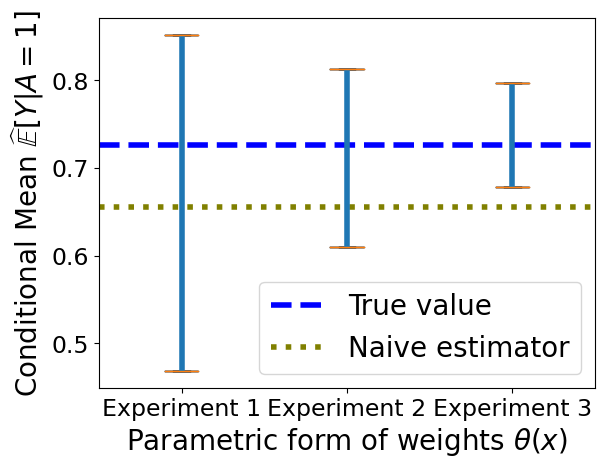

In [169]:
fig, ax = plt.subplots()

# Set the x-axis limits and labels
# ax.axhline(y=0.3758113283612175, color='blue', linestyle='dashed', label = "True value", linewidth=4)
# ax.axhline(y=0.4758113283612175, color='olive', linestyle=':', label = "Naive estimator", linewidth=4)
ax.axhline(y=0.726, color="blue", linestyle="dashed", label="True value", linewidth=4)
ax.axhline(
    y=0.655828148843761,
    color="olive",
    linestyle=":",
    label="Naive estimator",
    linewidth=4,
)

ax.boxplot([max_vals_1, min_vals_1], positions=[1, 1], widths=0.2, showfliers=False)
plt.vlines(1, ymin=min(min_vals_1), ymax=max(max_vals_1), linewidth=4)

ax.boxplot([max_vals_2, min_vals_2], positions=[2, 2], widths=0.2, showfliers=False)
plt.vlines(2, ymin=min(min_vals_2), ymax=max(max_vals_2), linewidth=4)

ax.boxplot([max_vals_3, min_vals_3], positions=[3, 3], widths=0.2, showfliers=False)
plt.vlines(3, ymin=min(min_vals_3), ymax=max(max_vals_3), linewidth=4)

ax.set_xticks([1, 2, 3])
ax.set_xticklabels(["Experiment 1", "Experiment 2", "Experiment 3"])
# ax.set_xticklabels(['1', '2', '3'])
# ax.set_yticks(fontsize = 14)
ax.tick_params(axis="both", which="major", labelsize=17)
ax.tick_params(axis="both", which="minor", labelsize=16)

ax.set_ylabel("Conditional Mean $\widehat{\mathbb{E}}[Y|A=1]$", fontsize=20)
# ax.set_xlabel("Number of constraints $\mathbb{E}[A|Y]$", fontsize = 20)
ax.set_xlabel("Parametric form of weights $\\theta(x)$", fontsize=20)

# Add a legend
ax.legend(loc="lower right", fontsize=20)
# ax.set_title("Confidence bounds versus number of constraints used \n German credit semi-synthetic data")
# ax.set_title("Confidence bounds by parametric form of weights \n Simulated data")

plt.savefig(rf"figures/{exp}_{data}.png", bbox_inches="tight")

In [151]:
exp = "Restrictions"
data = "synthetic"

In [152]:
min_vals_1 = load_vals(f"results/synthetic/Restrictions/min_loss_c1_")
max_vals_1 = load_vals(f"results/synthetic/Restrictions/max_loss_c1_")
min_vals_2 = load_vals(f"results/synthetic/Restrictions/min_loss_c2_")
max_vals_2 = load_vals(f"results/synthetic/Restrictions/max_loss_c2_")
min_vals_3 = load_vals(f"results/synthetic/Restrictions/min_loss_c3_")
max_vals_3 = load_vals(f"results/synthetic/Restrictions/max_loss_c3_")

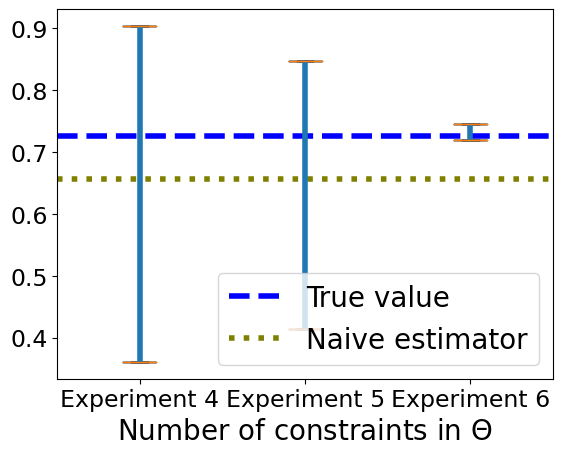

In [153]:
fig, ax = plt.subplots()

# Set the x-axis limits and labels
# ax.axhline(y=0.3758113283612175, color='blue', linestyle='dashed', label = "True value", linewidth=4)
# ax.axhline(y=0.4758113283612175, color='olive', linestyle=':', label = "Naive estimator", linewidth=4)
ax.axhline(y=0.726, color="blue", linestyle="dashed", label="True value", linewidth=4)
ax.axhline(
    y=0.655828148843761,
    color="olive",
    linestyle=":",
    label="Naive estimator",
    linewidth=4,
)

ax.boxplot([max_vals_1, min_vals_1], positions=[1, 1], widths=0.2, showfliers=False)
plt.vlines(1, ymin=min(min_vals_1), ymax=max(max_vals_1), linewidth=4)

ax.boxplot([max_vals_2, min_vals_2], positions=[2, 2], widths=0.2, showfliers=False)
plt.vlines(2, ymin=min(min_vals_2), ymax=max(max_vals_2), linewidth=4)

ax.boxplot([max_vals_3, min_vals_3], positions=[3, 3], widths=0.2, showfliers=False)
plt.vlines(3, ymin=min(min_vals_3), ymax=max(max_vals_3), linewidth=4)

ax.set_xticks([1, 2, 3])
ax.set_xticklabels(["Experiment 4", "Experiment 5", "Experiment 6"])
# ax.set_xticklabels(['1', '2', '3'])
# ax.set_yticks(fontsize = 14)
ax.tick_params(axis="both", which="major", labelsize=17)
ax.tick_params(axis="both", which="minor", labelsize=16)

# ax.set_ylabel("Conditional Mean $\widehat{\mathbb{E}}[Y|A=1]$", fontsize = 20)
ax.set_xlabel("Number of constraints in $\Theta$", fontsize=20)
# ax.set_xlabel("Parametric form of weights $\phi(x)$", fontsize = 20)

# Add a legend
ax.legend(loc="lower right", fontsize=20)
# ax.set_title("Confidence bounds versus number of constraints used \n German credit semi-synthetic data")
# ax.set_title("Confidence bounds by parametric form of weights \n Simulated data")

plt.savefig(rf"figures/{exp}_{data}.png", bbox_inches="tight")

In [154]:
exp = "Interactions"
data = "Semi-synthetic"

In [155]:
min_vals_1 = load_vals(f"results/Semi-synthetic/Interactions/max_loss_all_")
max_vals_1 = load_vals(f"results/Semi-synthetic/Interactions/min_loss_all_")
min_vals_2 = load_vals(f"results/Semi-synthetic/Interactions/min_loss_4_")
max_vals_2 = load_vals(f"results/Semi-synthetic/Interactions/max_loss_4_")
min_vals_3 = load_vals(f"results/Semi-synthetic/Interactions/min_loss_3_")
max_vals_3 = load_vals(f"results/Semi-synthetic/Interactions/max_loss_3_")

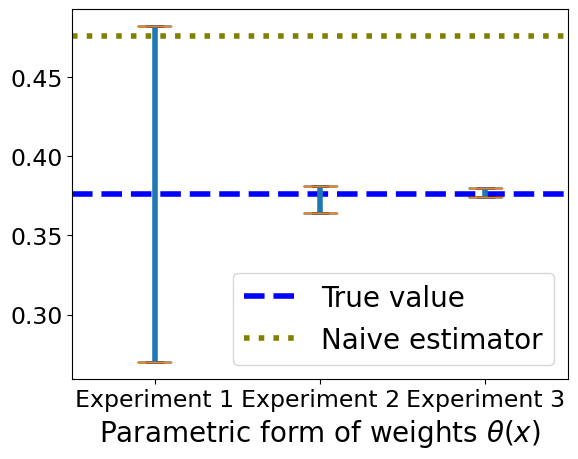

In [156]:
fig, ax = plt.subplots()

# Set the x-axis limits and labels
ax.axhline(
    y=0.3758113283612175,
    color="blue",
    linestyle="dashed",
    label="True value",
    linewidth=4,
)
ax.axhline(
    y=0.4758113283612175,
    color="olive",
    linestyle=":",
    label="Naive estimator",
    linewidth=4,
)
# ax.axhline(y=0.726, color='blue', linestyle='dashed', label = "True value", linewidth=4)
# ax.axhline(y=0.655828148843761, color='olive', linestyle=':', label = "Naive estimator", linewidth=4)

ax.boxplot([max_vals_1, min_vals_1], positions=[1, 1], widths=0.2, showfliers=False)
plt.vlines(1, ymin=min(min_vals_1), ymax=max(max_vals_1), linewidth=4)

ax.boxplot([max_vals_2, min_vals_2], positions=[2, 2], widths=0.2, showfliers=False)
plt.vlines(2, ymin=min(min_vals_2), ymax=max(max_vals_2), linewidth=4)

ax.boxplot([max_vals_3, min_vals_3], positions=[3, 3], widths=0.2, showfliers=False)
plt.vlines(3, ymin=min(min_vals_3), ymax=max(max_vals_3), linewidth=4)

ax.set_xticks([1, 2, 3])
ax.set_xticklabels(["Experiment 1", "Experiment 2", "Experiment 3"])
# ax.set_xticklabels(['1', '2', '3'])
# ax.set_yticks(fontsize = 14)
ax.tick_params(axis="both", which="major", labelsize=17)
ax.tick_params(axis="both", which="minor", labelsize=16)

# ax.set_ylabel("Conditional Mean $\widehat{\mathbb{E}}[Y|A=1]$", fontsize = 20)
# ax.set_xlabel("Number of constraints $\mathbb{E}[A|Y]$", fontsize = 20)
ax.set_xlabel("Parametric form of weights $\\theta(x)$", fontsize=20)

# Add a legend
ax.legend(loc="lower right", fontsize=20)
# ax.set_title("Confidence bounds versus number of constraints used \n German credit semi-synthetic data")
# ax.set_title("Confidence bounds by parametric form of weights \n Simulated data")

plt.savefig(rf"figures/{exp}_{data}.png", bbox_inches="tight")

In [161]:
exp = "Restrictions"
data = "Semi-synthetic"

In [162]:
min_vals_1 = load_vals(f"results/Semi-synthetic/Restrictions/min_loss_c1_")
max_vals_1 = load_vals(f"results/Semi-synthetic/Restrictions/max_loss_c1_")
min_vals_2 = load_vals(f"results/Semi-synthetic/Restrictions/min_loss_c2_")
max_vals_2 = load_vals(f"results/Semi-synthetic/Restrictions/max_loss_c2_")
min_vals_3 = load_vals(f"results/Semi-synthetic/Restrictions/min_loss_c3_")
max_vals_3 = load_vals(f"results/Semi-synthetic/Restrictions/max_loss_c3_")

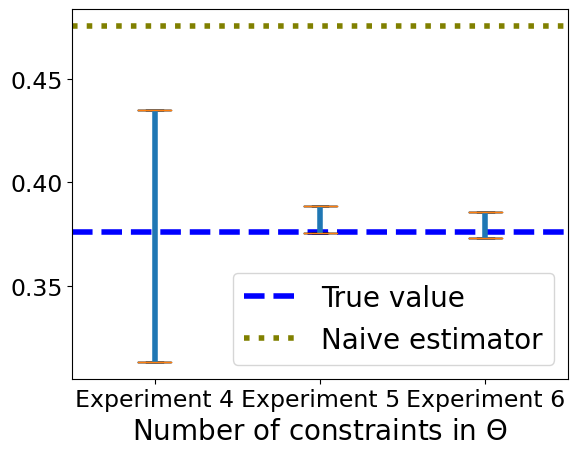

In [163]:
fig, ax = plt.subplots()

# Set the x-axis limits and labels
ax.axhline(
    y=0.3758113283612175,
    color="blue",
    linestyle="dashed",
    label="True value",
    linewidth=4,
)
ax.axhline(
    y=0.4758113283612175,
    color="olive",
    linestyle=":",
    label="Naive estimator",
    linewidth=4,
)
# ax.axhline(y=0.726, color='blue', linestyle='dashed', label = "True value", linewidth=4)
# ax.axhline(y=0.655828148843761, color='olive', linestyle=':', label = "Naive estimator", linewidth=4)

ax.boxplot([max_vals_1, min_vals_1], positions=[1, 1], widths=0.2, showfliers=False)
plt.vlines(1, ymin=min(min_vals_1), ymax=max(max_vals_1), linewidth=4)

ax.boxplot([max_vals_2, min_vals_2], positions=[2, 2], widths=0.2, showfliers=False)
plt.vlines(2, ymin=min(min_vals_2), ymax=max(max_vals_2), linewidth=4)

ax.boxplot([max_vals_3, min_vals_3], positions=[3, 3], widths=0.2, showfliers=False)
plt.vlines(3, ymin=min(min_vals_3), ymax=max(max_vals_3), linewidth=4)

ax.set_xticks([1, 2, 3])
ax.set_xticklabels(["Experiment 4", "Experiment 5", "Experiment 6"])
# ax.set_xticklabels(['1', '2', '3'])
# ax.set_yticks(fontsize = 14)
ax.tick_params(axis="both", which="major", labelsize=17)
ax.tick_params(axis="both", which="minor", labelsize=16)

# ax.set_ylabel("Conditional Mean $\widehat{\mathbb{E}}[Y|A=1]$", fontsize = 20)
ax.set_xlabel("Number of constraints in $\Theta$", fontsize=20)
# ax.set_xlabel("Parametric form of weights $\phi(x)$", fontsize = 20)

# Add a legend
ax.legend(loc="lower right", fontsize=20)
# ax.set_title("Confidence bounds versus number of constraints used \n German credit semi-synthetic data")
# ax.set_title("Confidence bounds by parametric form of weights \n Simulated data")

plt.savefig(rf"figures/{exp}_{data}.png", bbox_inches="tight")

In [15]:
min_vals_1 = load_vals(f"optimization/non_close_results/min_loss_logistic_full_")
max_vals_1 = load_vals(f"optimization/non_close_results/max_loss_logistic_full_")

In [11]:
exp = "logistic"
data = "Semi-synthetic"

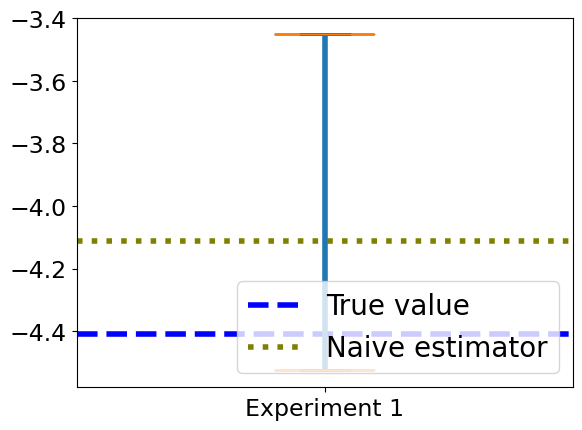

In [12]:
fig, ax = plt.subplots()

# Set the x-axis limits and labels
ax.axhline(
    y=-4.40884644, color="blue", linestyle="dashed", label="True value", linewidth=4
)
ax.axhline(
    y=-4.11165405, color="olive", linestyle=":", label="Naive estimator", linewidth=4
)
# ax.axhline(y=0.726, color='blue', linestyle='dashed', label = "True value", linewidth=4)
# ax.axhline(y=0.655828148843761, color='olive', linestyle=':', label = "Naive estimator", linewidth=4)

ax.boxplot([max_vals_1, min_vals_1], positions=[1, 1], widths=0.2, showfliers=False)
plt.vlines(1, ymin=min(min_vals_1), ymax=max(max_vals_1), linewidth=4)

ax.set_xticks([1])
ax.set_xticklabels(["Experiment 1"])
# ax.set_xticklabels(['1', '2', '3'])
# ax.set_yticks(fontsize = 14)
ax.tick_params(axis="both", which="major", labelsize=17)
ax.tick_params(axis="both", which="minor", labelsize=16)

# ax.set_ylabel("Conditional Mean $\widehat{\mathbb{E}}[Y|A=1]$", fontsize = 20)
# ax.set_xlabel("Number of constraints in $\Theta$", fontsize = 20)
# ax.set_xlabel("Parametric form of weights $\phi(x)$", fontsize = 20)

# Add a legend
ax.legend(loc="lower right", fontsize=20)
# ax.set_title("Confidence bounds versus number of constraints used \n German credit semi-synthetic data")
# ax.set_title("Confidence bounds by parametric form of weights \n Simulated data")

plt.savefig(rf"figures/{exp}_{data}.png", bbox_inches="tight")

In [16]:
avg_max_1 = np.mean(max_vals_1)
std_max_1 = np.std(max_vals_1)
avg_min_1 = np.mean(min_vals_1)
std_min_1 = np.std(min_vals_1)
print(avg_max_1, avg_min_1, std_max_1, std_min_1)

-3.4514754740877067 -4.52585583388703 0.0 0.0


In [17]:
print(avg_max_1, avg_min_1, std_max_1, std_min_1)

-3.4514754740877067 -4.52585583388703 0.0 0.0
